# Intrusion Detection System using Machine Learning

Nel contesto della cybersecurity e degli intrusion detection systems, il dataset NSL-KDD rappresenta un benchmark comune per valutare le prestazioni degli IDS.

Il progetto ha lo scopo di analizzare il dataset, individuare le features che possono aiutare a discriminare la tipologia di traffico, ottenere una classificazione binaria e infine valutare i risultati ottenuti. Il notebook è strutturato nei seguenti punti:

1. **Import Libraries:** vengono importate librerie essenziali come pandas, numpy, matplotlib, seaborn e scikit-learn per semplificare la fase di data manipulation, visualization e la costruzione del modello di machine learning.

2. **Read Dataset:** vengono caricati in un dataframe il dataset di training e di test.

3. **Data Cleaning:** In questa fase vengono effettuate operazioni di pulizia del dataset, con la rimozione di entries che presentano missing values, valutazione degli outliers e preparazione del dataset per la fase di EDA successiva.

4. **EDA and Visualization:** L'analisi esplorativa fornisce una serie di statistiche sulla struttura del dataset, sulla distribuzione delle features, correlazioni e potenziali pattern.

5. **Preprocessing:** Vengono implementate tecniche di pre-processing come normalizzazione, encoding delle variabili categoriche e data transformation per l'addestramento con il modello di machine learning.

6. **Feature Engineering:** Le strategie di feature engineering creano nuove feature, estraggono informazioni rilevanti, migliorano il potere discriminativo ed eliminano feature inutili ai fini della classificazione.

7. **Model Building:** viene istanziato il modello di machine learning per effettuare la classificazione binaria.
   
8. **Evaluation:** Vengono valutate le prestazioni del classificatore, con un'analisi sulla tipologia di errori commessi.



# 1. IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams["figure.figsize"] = (10,6)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import SelectKBest

# 2. READ DATASET

In [2]:
directory = r"C:\Users\nokia\Documents\University\A.A. 2023-2024\Network Security\NS_Project\NSL-KDD_Dataset"

train_filename = r"KDDTrain+.txt"
test_filename = r"KDDTest+.txt"

train_path = os.path.join(directory, train_filename)
test_path = os.path.join(directory, test_filename)

df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

## 2.1 Adjust Columns

In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])


df.columns = columns 
df_test.columns = columns

df_0 = df.copy()
df_test_0 = df_test.copy()

In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


## 2.2 Insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.00,287.15,2604.53,0.00,0.00,0.00,0.00,42908.00
src_bytes,125972.00,45567.10,5870354.48,0.00,0.00,44.00,276.00,1379963888.00
dst_bytes,125972.00,19779.27,4021285.11,0.00,0.00,0.00,516.00,1309937401.00
land,125972.00,0.00,0.01,0.00,0.00,0.00,0.00,1.00
wrong_fragment,125972.00,0.02,0.25,0.00,0.00,0.00,0.00,3.00
urgent,125972.00,0.00,0.01,0.00,0.00,0.00,0.00,3.00
hot,125972.00,0.20,2.15,0.00,0.00,0.00,0.00,77.00
num_failed_logins,125972.00,0.00,0.05,0.00,0.00,0.00,0.00,5.00
logged_in,125972.00,0.40,0.49,0.00,0.00,0.00,1.00,1.00
num_compromised,125972.00,0.28,23.94,0.00,0.00,0.00,0.00,7479.00


## 2.3 Correlation Matrix

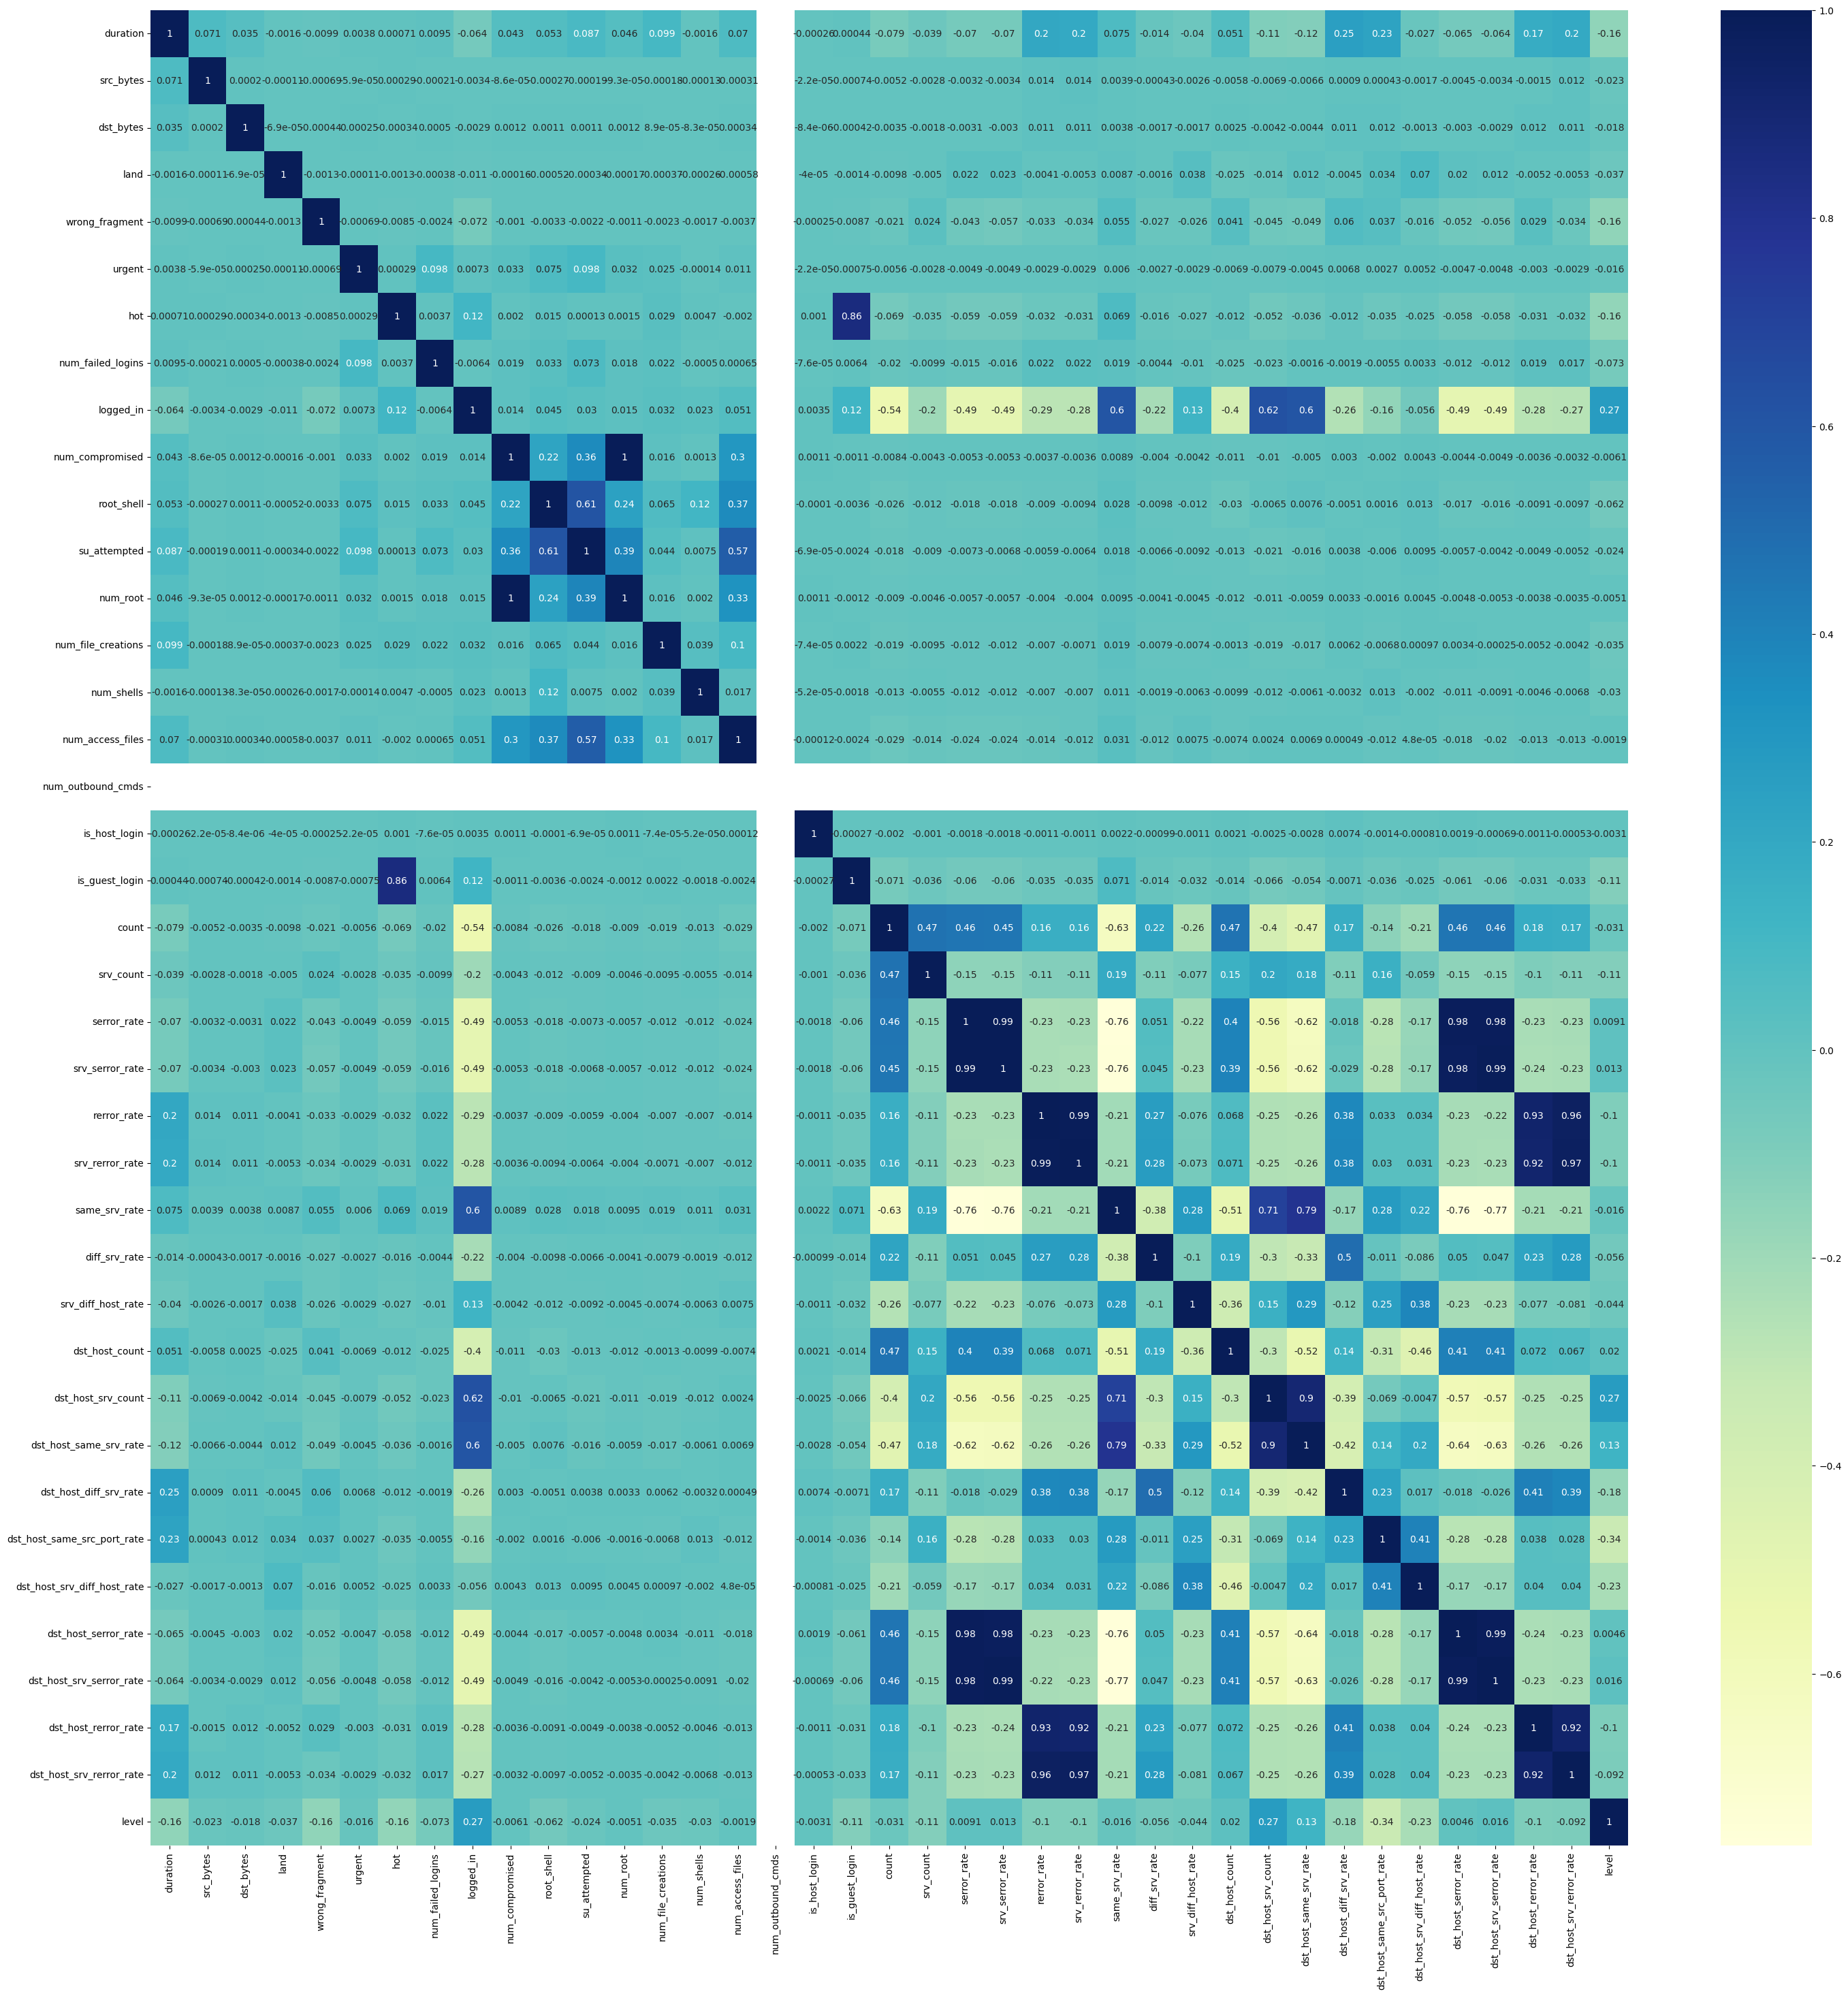

In [7]:
corr_mat = df.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(35,35))
dataplot = sns.heatmap(corr_mat, cmap="YlGnBu", annot=True)
plt.show()



high-correlated features

In [8]:
threshold = 0.95

mask = (corr_mat >= threshold) | (corr_mat <= -threshold)

stacked_corr = corr_mat.stack()

high_corr_pairs = stacked_corr[(mask.stack()) & (stacked_corr != 1.0)].reset_index() # excluding auto-correlations

high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

print(high_corr_pairs)

                   Feature 1                 Feature 2  Correlation
0            num_compromised                  num_root         1.00
1                   num_root           num_compromised         1.00
2                serror_rate           srv_serror_rate         0.99
3                serror_rate      dst_host_serror_rate         0.98
4                serror_rate  dst_host_srv_serror_rate         0.98
5            srv_serror_rate               serror_rate         0.99
6            srv_serror_rate      dst_host_serror_rate         0.98
7            srv_serror_rate  dst_host_srv_serror_rate         0.99
8                rerror_rate           srv_rerror_rate         0.99
9                rerror_rate  dst_host_srv_rerror_rate         0.96
10           srv_rerror_rate               rerror_rate         0.99
11           srv_rerror_rate  dst_host_srv_rerror_rate         0.97
12      dst_host_serror_rate               serror_rate         0.98
13      dst_host_serror_rate           srv_serro

# 3. DATA CLEANING

## 3.1 Null Values

In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
def unique_values(df, columns):

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [11]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

## 3.2 Duplicates

In [12]:
df.duplicated().sum()

0

## 3.3 Outliers

<Figure size 2000x4000 with 0 Axes>

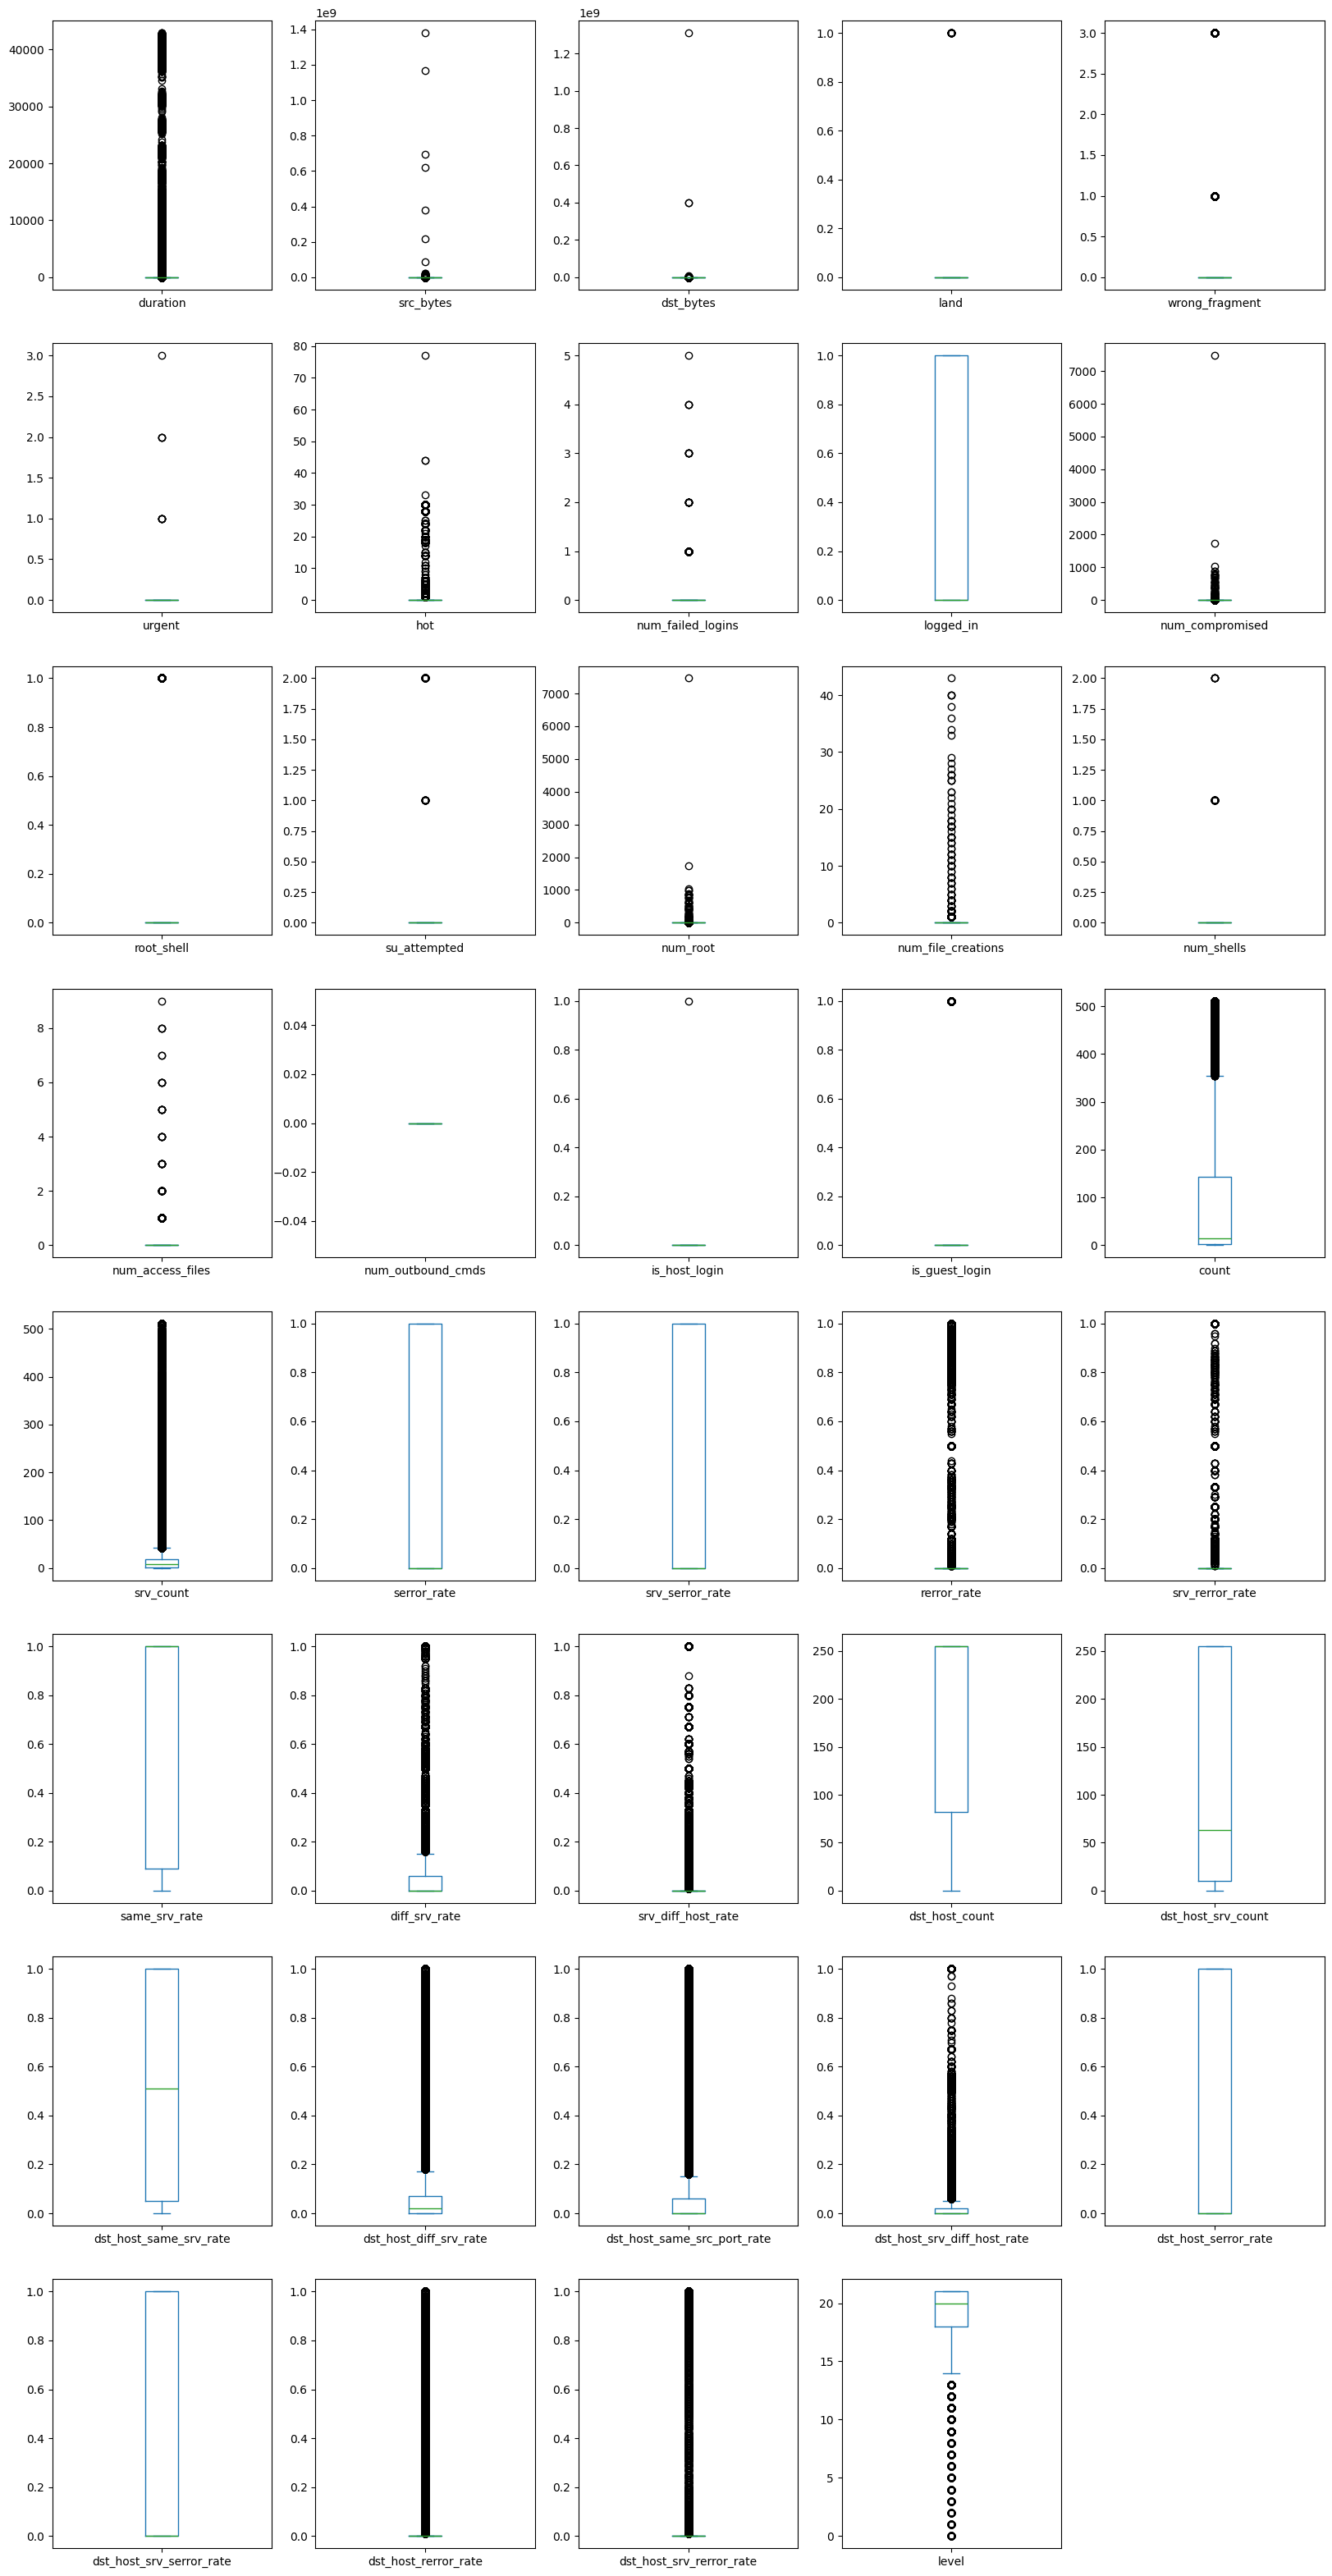

In [13]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

## 3.4 Classify Attack or Not, labels 0 and 1

In [14]:
df['attack_type'] = df['attack'] 

attack_type = df['attack_type']

attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n 

df_test['attack_type'] = df_test['attack'] 

attack_type_test = df_test['attack_type']

attack_n = []
for i in df_test.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df_test['attack'] = attack_n 

df_test.T

,0,1,2,3,4,5,6,7,8,9,...,22533,22534,22535,22536,22537,22538,22539,22540,22541,22542
duration,0,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
protocol_type,tcp,tcp,icmp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,icmp,tcp,tcp,tcp,udp,tcp
service,private,ftp_data,eco_i,telnet,http,smtp,telnet,http,ftp,telnet,...,private,http,iso_tsap,smtp,ecr_i,smtp,http,http,domain_u,sunrpc
flag,REJ,SF,SF,RSTO,SF,SF,SF,SF,SF,SF,...,REJ,SF,REJ,SF,SF,SF,SF,SF,SF,REJ
src_bytes,0,12983,20,0,267,1022,129,327,26,0,...,0,280,0,2599,1032,794,317,54540,42,0
dst_bytes,0,0,0,15,14515,387,174,467,157,0,...,0,6087,0,293,0,333,938,8314,42,0
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [15]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

In [16]:
df['attack_type'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [17]:

df_test['attack_type'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

# 4. EDA - VISUALIZATIONS

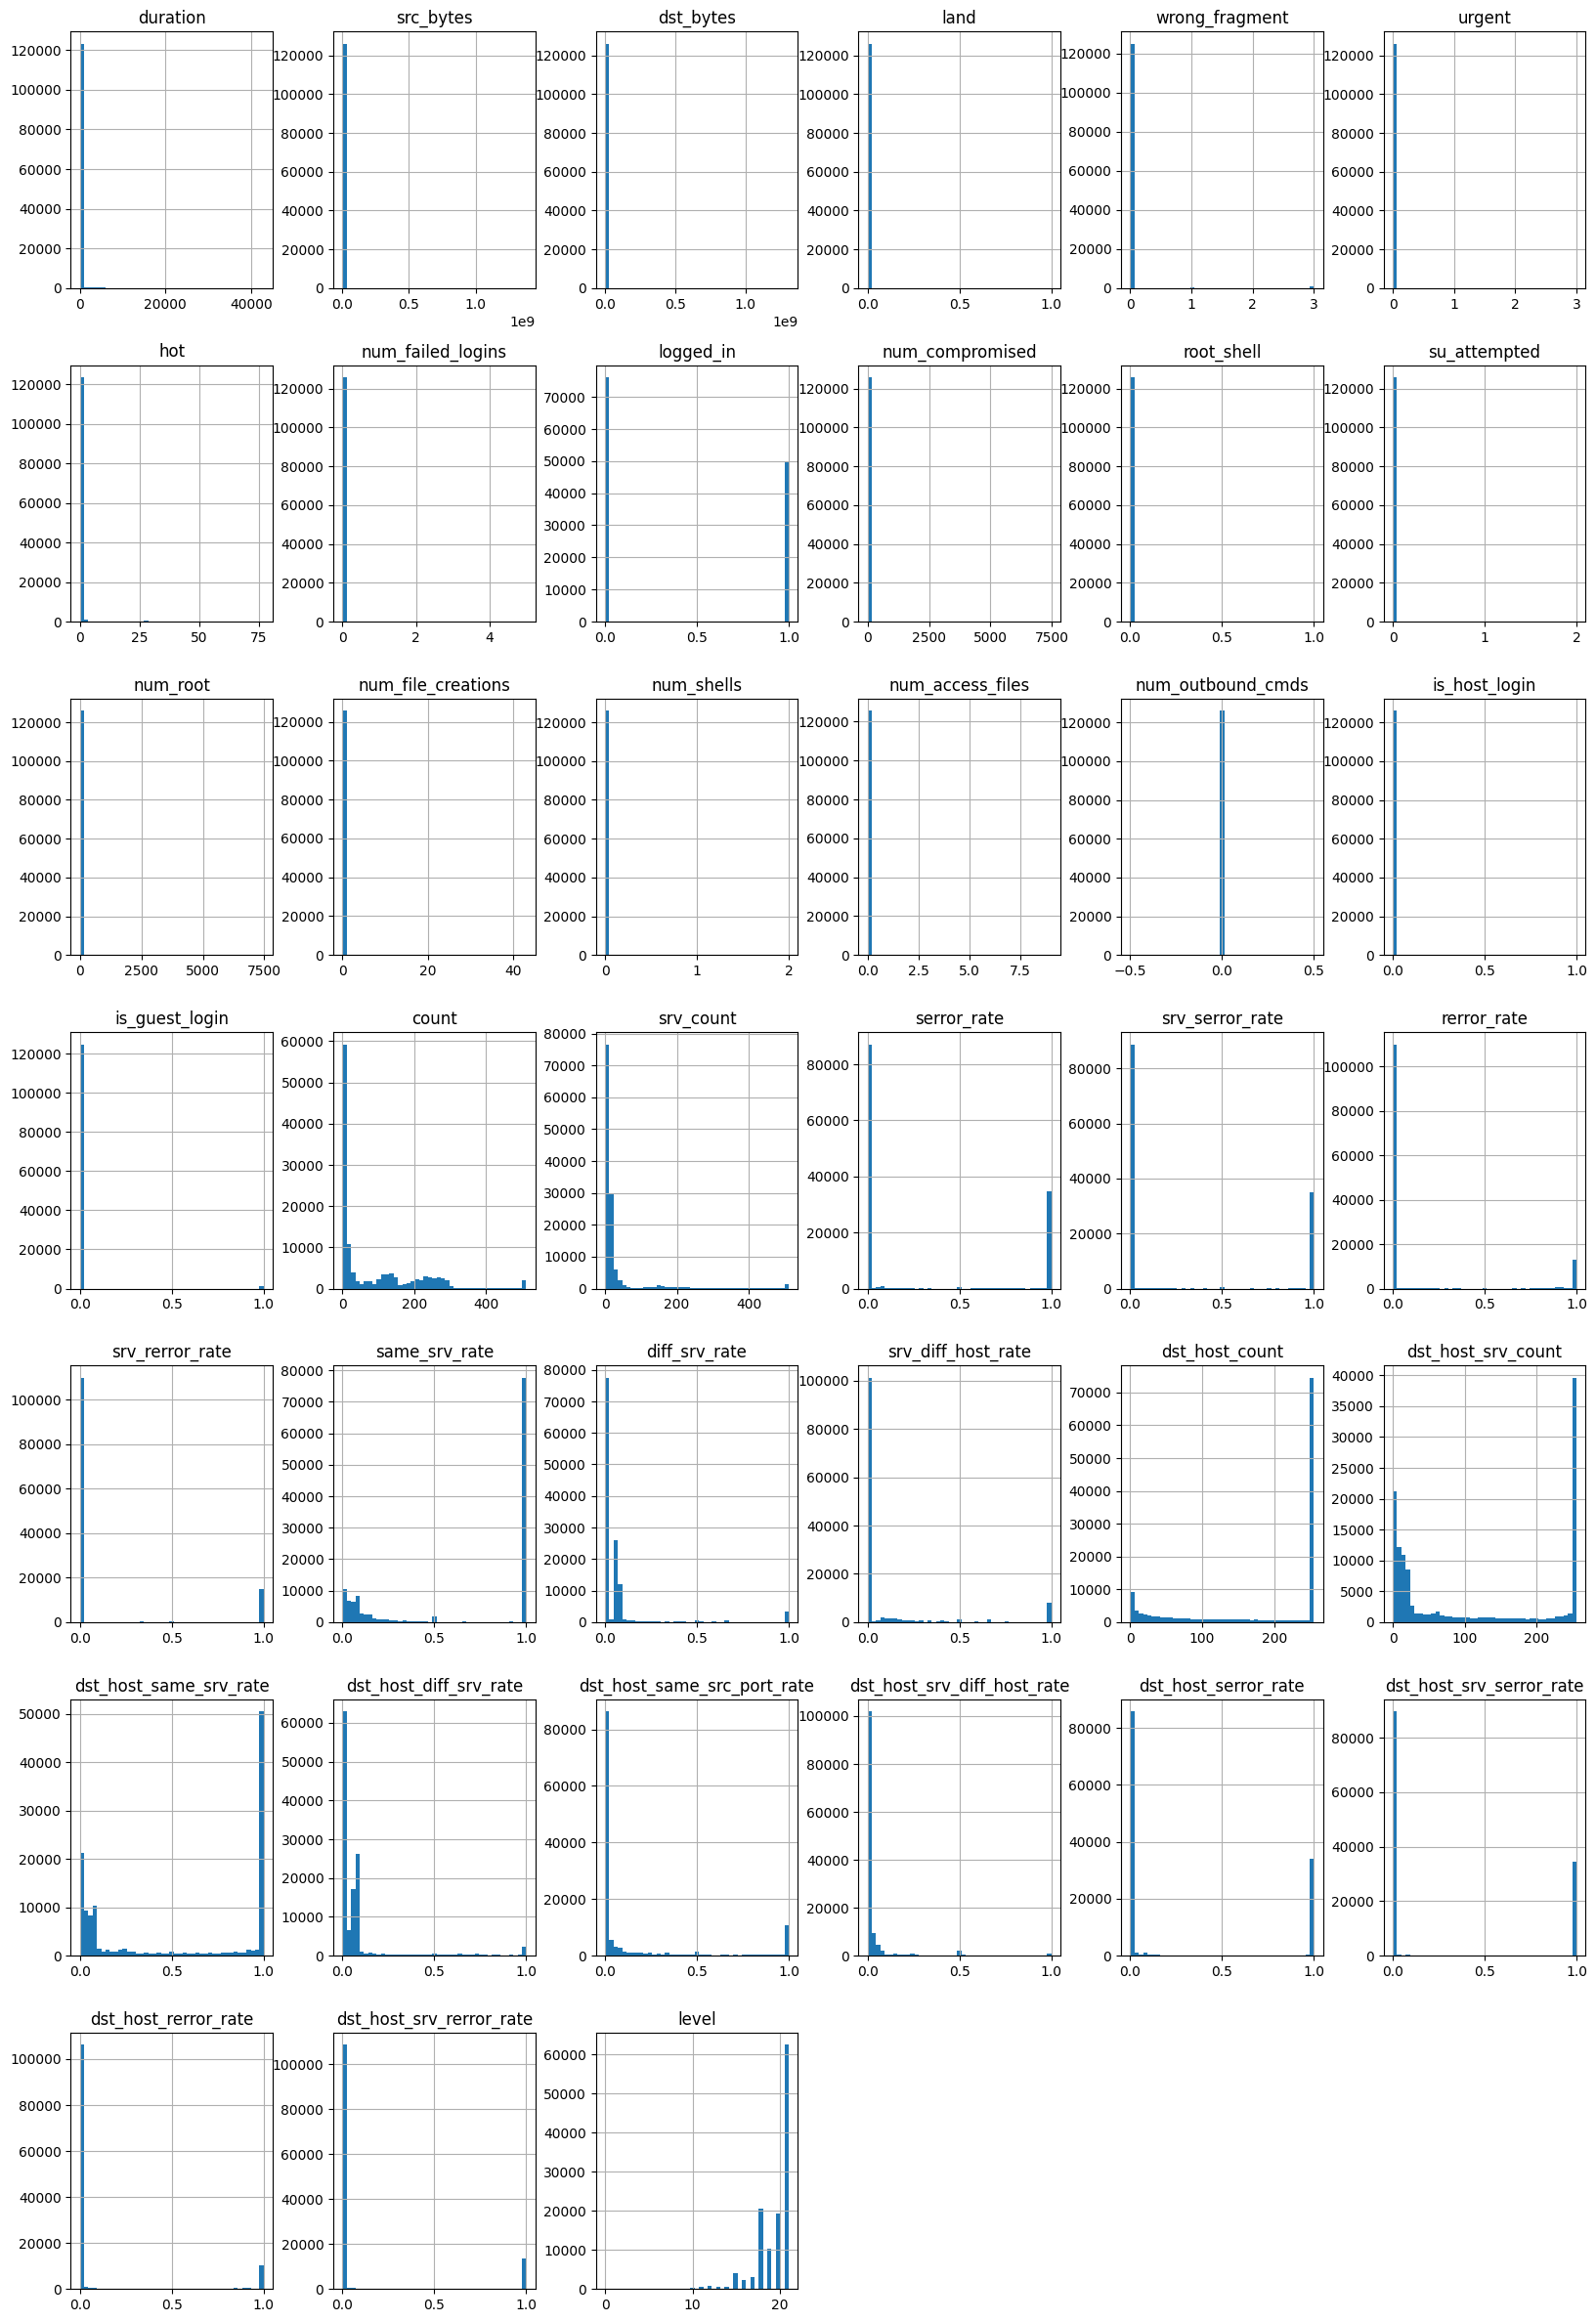

In [18]:
df.hist(bins=43,figsize=(20,30));

## 4.1 Protocol Type

In [19]:
df['attack']

0         normal
1         attack
2         normal
3         normal
4         attack
           ...  
125967    attack
125968    normal
125969    normal
125970    attack
125971    normal
Name: attack, Length: 125972, dtype: object

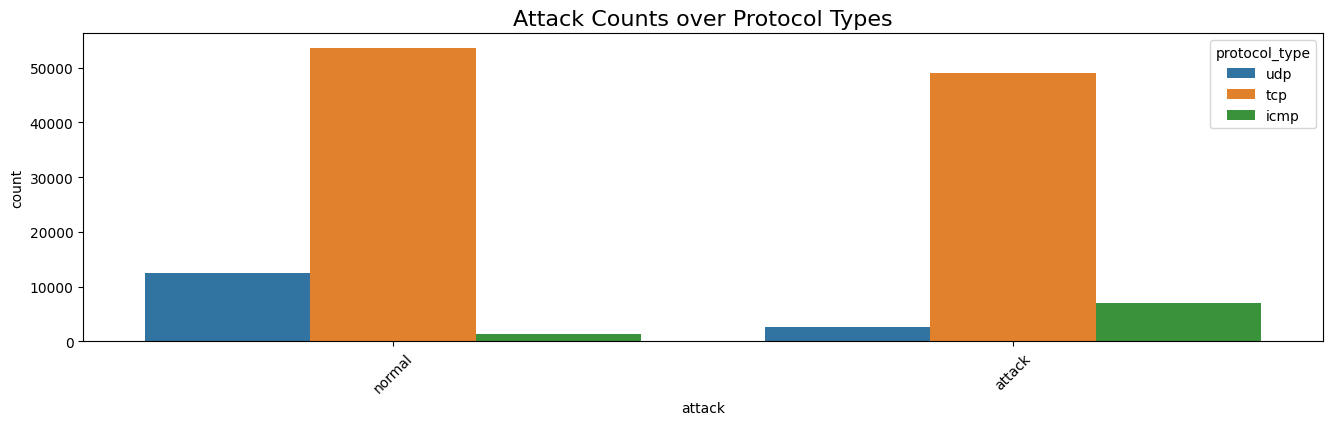

In [20]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [21]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.82
udp    0.12
icmp   0.07
Name: proportion, dtype: float64

In [22]:
attack_vs_protocol = pd.crosstab(df['attack'], df["protocol_type"])
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
attack,6982,49089,2559
normal,1309,53599,12434


## 4.2 Service used general

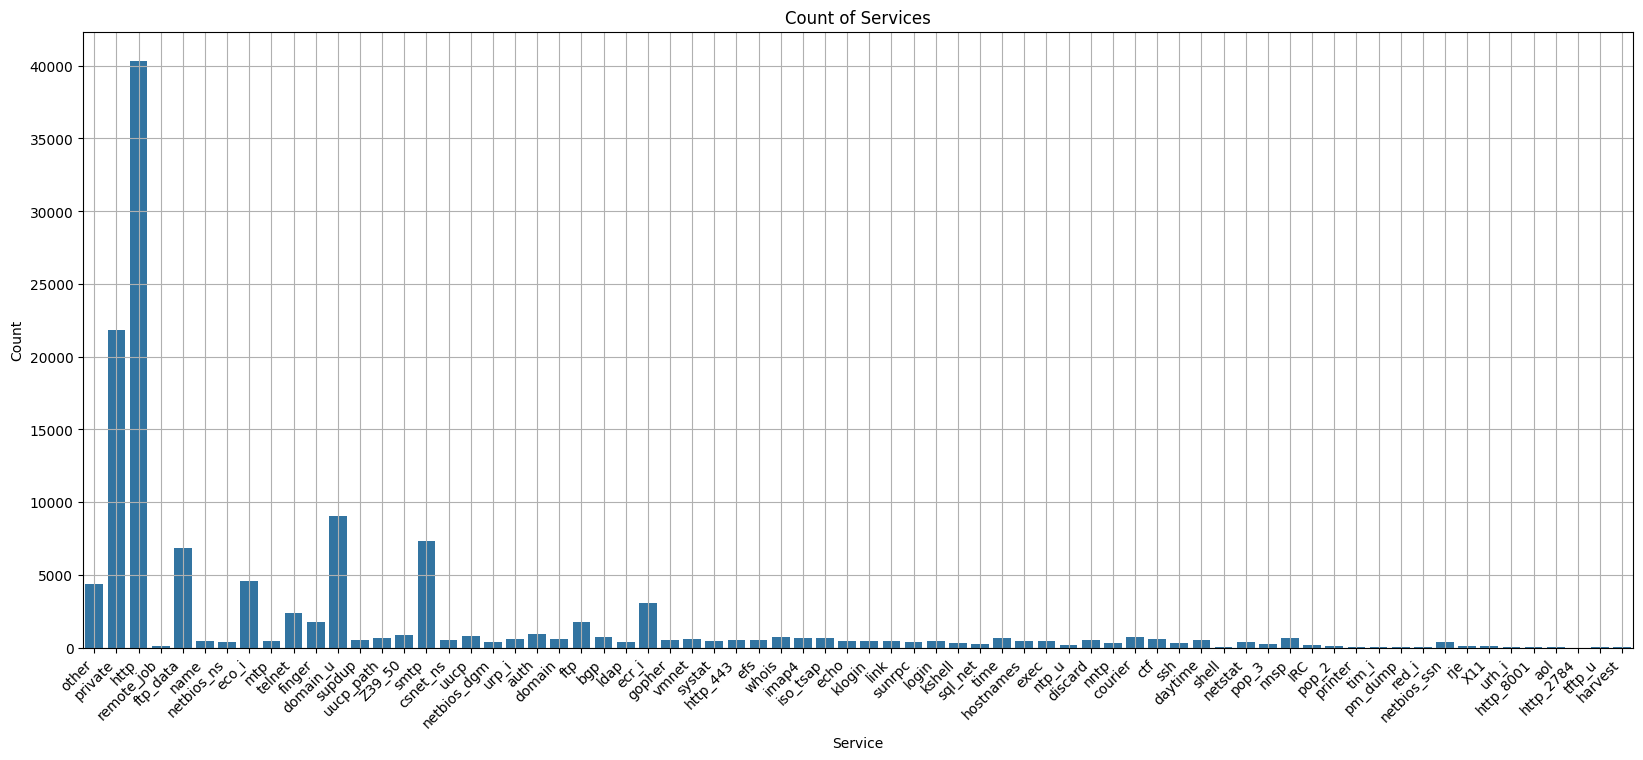

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()


## 4.3 Service used effect on attacks

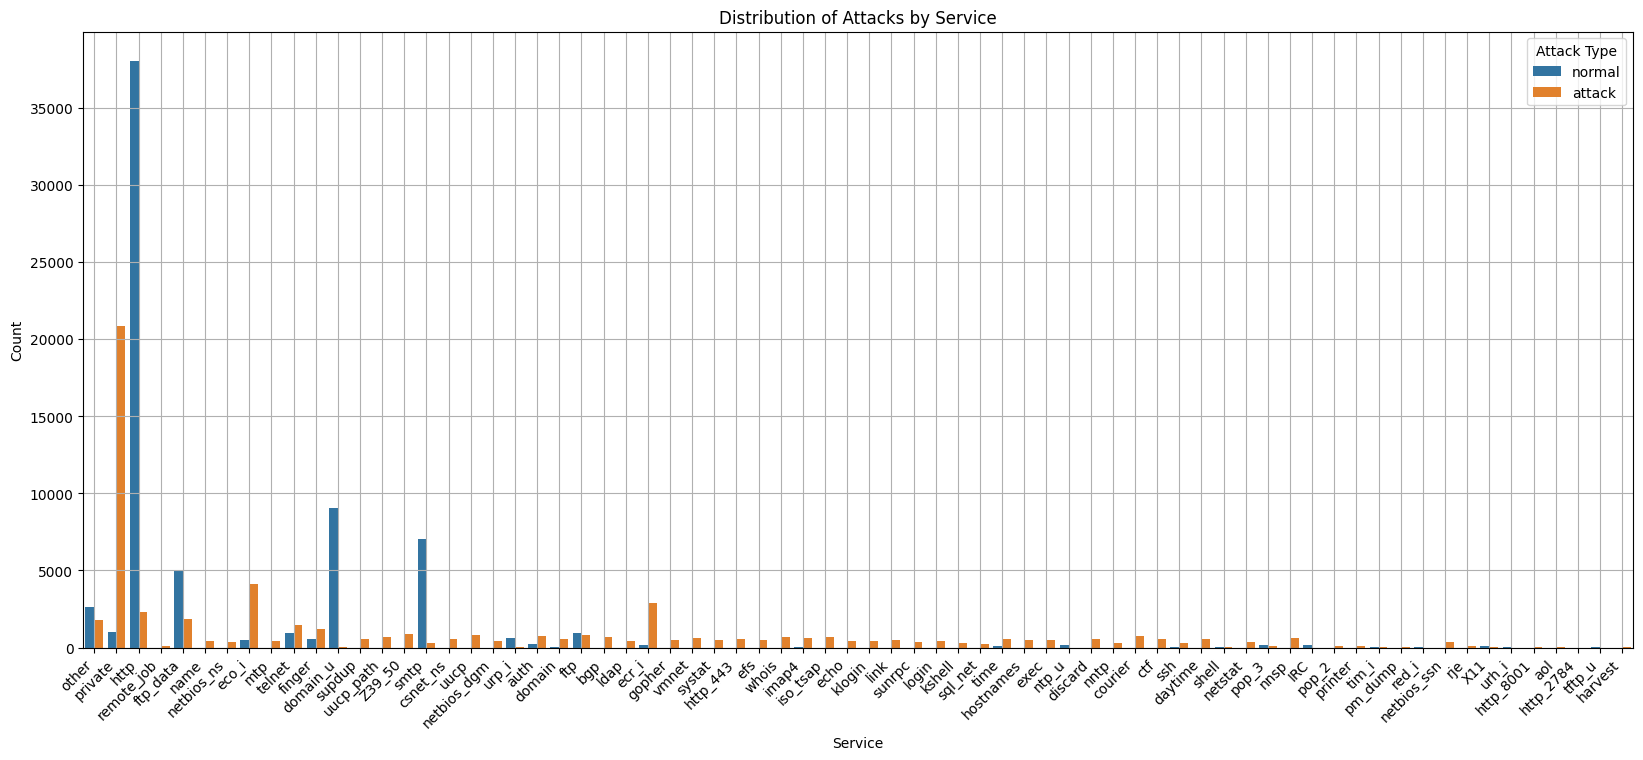

In [24]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


## 4.4 Kernel Density Estimate (KDE) Plot of Duration by Flag

Text(0, 0.5, 'Frequenza')

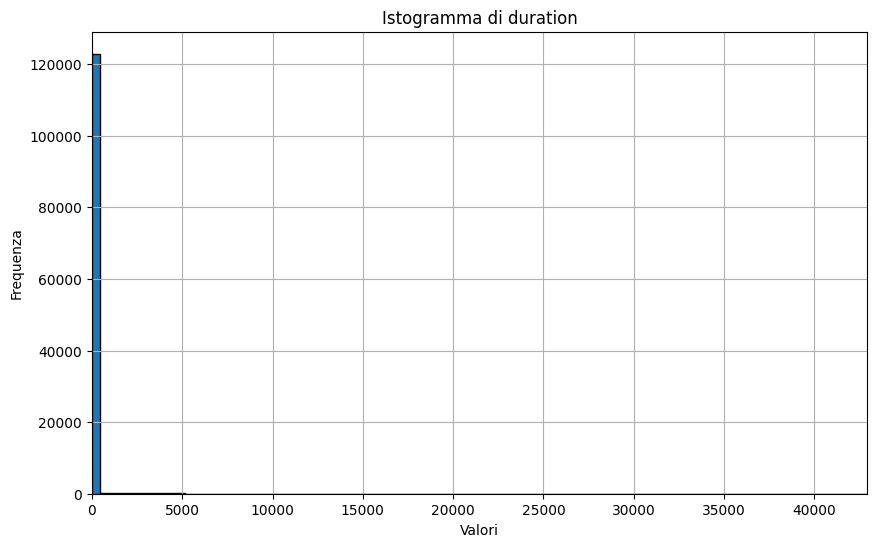

In [25]:
df['duration'].hist(bins = 100, edgecolor = 'black')

plt.xlim(df['duration'].min(), df['duration'].max())

plt.title('Istogramma di duration')
plt.xlabel('Valori')
plt.ylabel('Frequenza')

<Figure size 1200x800 with 0 Axes>

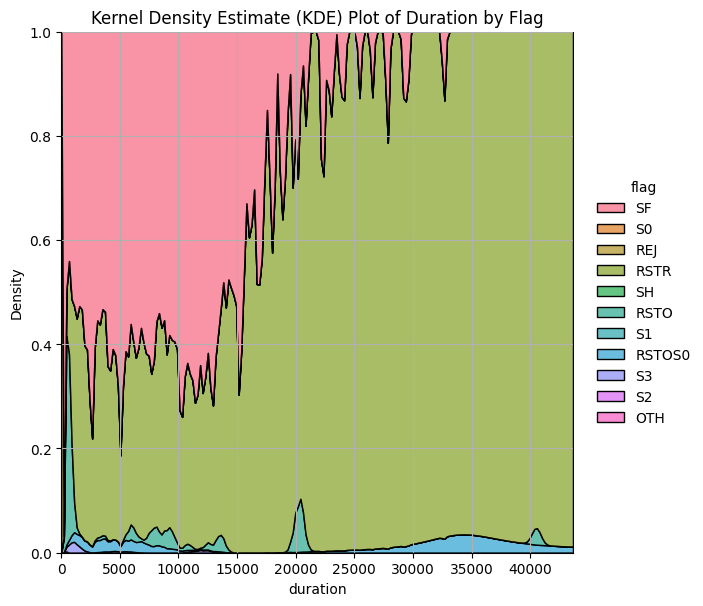

In [26]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    #palette="ch:rot=-.25,hue=1,light=.75",
    palette="husl",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()


## 4.5 Distribution of Attack Types by Guest Login

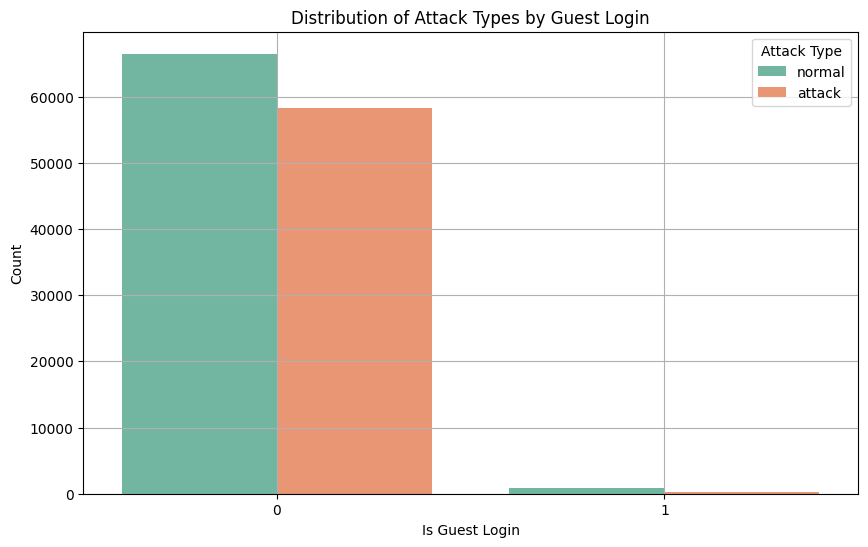

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

## 4.6 Attack Type Analysis

In [28]:
attack_vs_protocol = pd.crosstab(df.attack_type, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack_type,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


Dalla tabella si può notare come ci siano protocolli che sono più spesso target di attacco. Inoltre, alcuni attacchi come satan, nmap e ipsweep sono attacchi cross-protocol.

E' interessante notare come i dati ICMP sono poco frequenti nel traffico normale.

In [29]:
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

print("ICMP ATTACKS" + '-' * 60)
print(icmp_attacks)


ICMP ATTACKS------------------------------------------------------------
attack_type
back                  0
buffer_overflow       0
ftp_write             0
guess_passwd          0
imap                  0
ipsweep            3117
land                  0
loadmodule            0
multihop              0
neptune               0
nmap                981
normal             1309
perl                  0
phf                   0
pod                 201
portsweep             5
rootkit               0
satan                32
smurf              2646
spy                   0
teardrop              0
warezclient           0
warezmaster           0
Name: icmp, dtype: int64


In [30]:
print("TCP ATTACKS" + '-' * 60)
print(tcp_attacks)

TCP ATTACKS------------------------------------------------------------
attack_type
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep              482
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                 265
normal             53599
perl                   3
phf                    4
pod                    0
portsweep           2926
rootkit                7
satan               2184
smurf                  0
spy                    2
teardrop               0
warezclient          890
warezmaster           20
Name: tcp, dtype: int64


In [31]:
print("UDP ATTACKS" + '-' * 60)
print(udp_attacks)

UDP ATTACKS------------------------------------------------------------
attack_type
back                   0
buffer_overflow        0
ftp_write              0
guess_passwd           0
imap                   0
ipsweep                0
land                   0
loadmodule             0
multihop               0
neptune                0
nmap                 247
normal             12434
perl                   0
phf                    0
pod                    0
portsweep              0
rootkit                3
satan               1417
smurf                  0
spy                    0
teardrop             892
warezclient            0
warezmaster            0
Name: udp, dtype: int64


## 4.7 Flag Analysis

In [32]:
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}

    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
   
    for count, data_set in enumerate(data_list): 
        
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
     
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
     
        axs[count].set_title(labels[count])
        
    return axs  

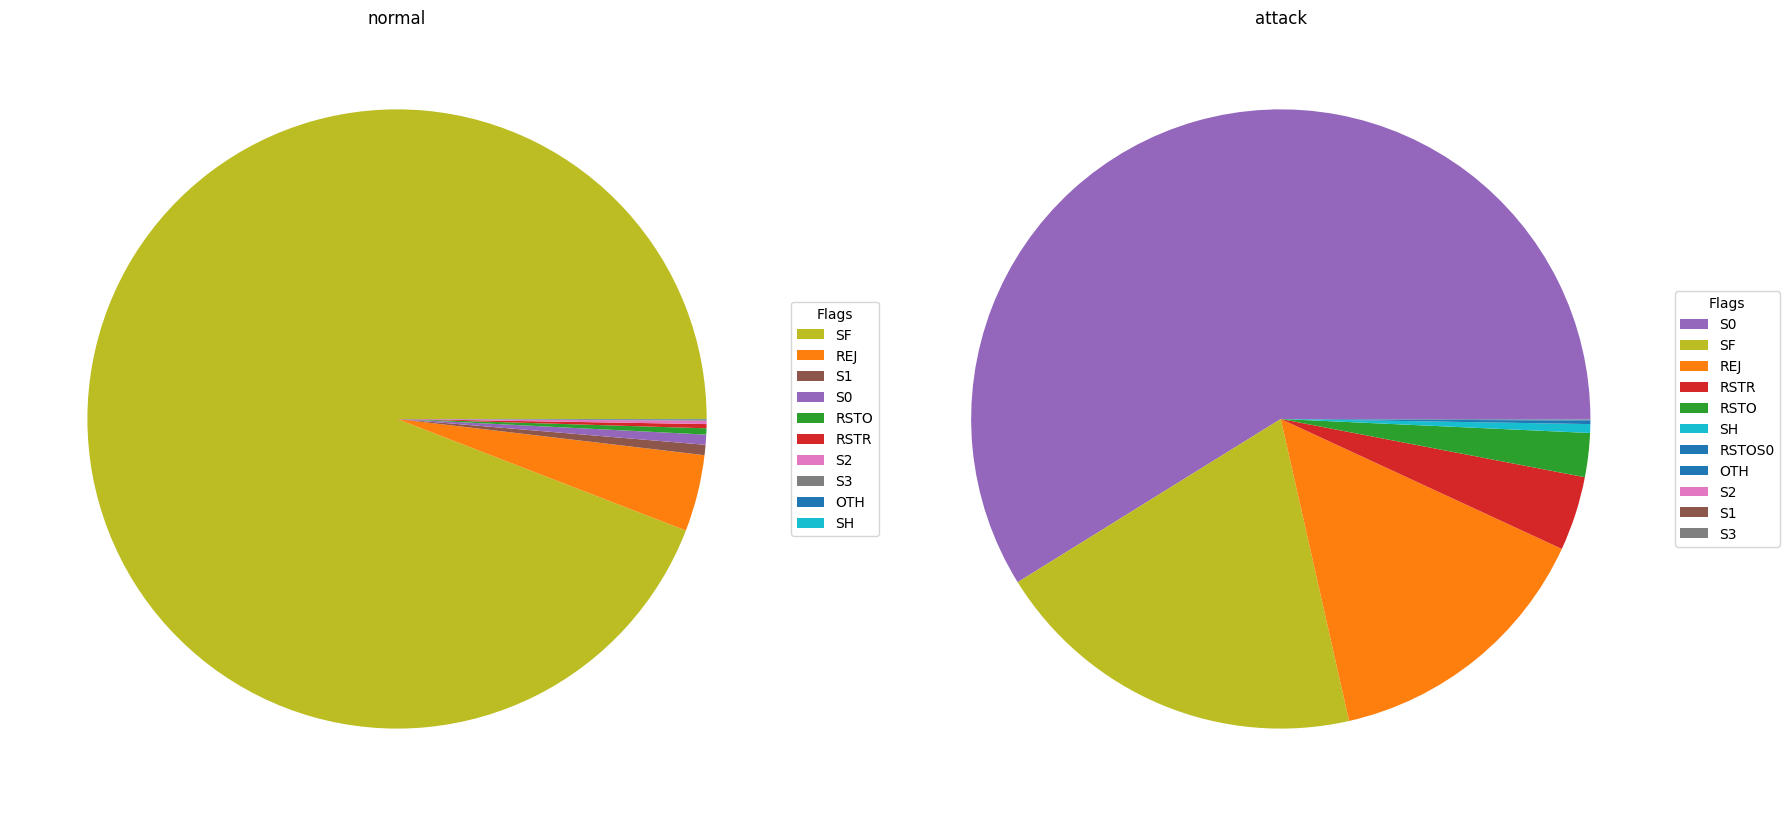

In [33]:
normal_flags = df.loc[df.attack == "normal"].flag.value_counts()
attack_flags = df.loc[df.attack != "normal"].flag.value_counts()

flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

## 4.8 Services Analysis

In [34]:
normal_services = df.loc[df.attack == "normal"].service.value_counts()
attack_services = df.loc[df.attack != "normal"].service.value_counts()

normal_services

service
http        38049
domain_u     9034
smtp         7029
ftp_data     4983
other        2604
private       982
ftp           918
telnet        917
urp_i         599
finger        545
eco_i         497
auth          236
ecr_i         190
pop_3         186
IRC           186
ntp_u         168
time           76
X11            67
domain         38
urh_i          10
red_i           8
tim_i           5
ssh             5
shell           4
imap4           3
tftp_u          3
Name: count, dtype: int64

In [35]:
attack_services

service
private      20871
eco_i         4089
ecr_i         2887
http          2289
ftp_data      1876
             ...  
http_8001        2
aol              2
harvest          2
http_2784        1
IRC              1
Name: count, Length: 66, dtype: int64

Si può notare il gran numero di servizi presenti fra gli attacchi. Infatti, mentre la maggioranza del traffico normale è di tipo HTTP, il traffico malevolo è distribuito tra numerosi servizi. Questo ci da un'importante informazione, in quanto significa che gli attaccanti cercano di bucare il sistema seguendo diverse strade.

Osservando il problema dagli occhi dell'amministratore di rete, la combinazione di protocollo, flag e service sembra dirci molto sulla natura del traffico in input. Accoppiando queste informazioni con feature come la durata della connessione e la quantità di dati scambiata all'interno della connessione può essere un buon punto di partenza per l'IDS.

## 4.9 Normal and Attack Count

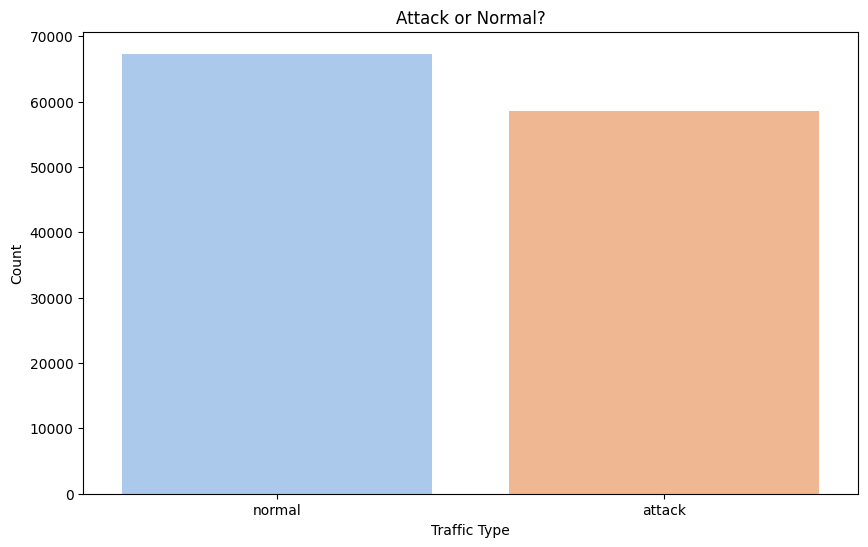

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['attack'], palette="pastel")

plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.title("Attack or Normal?")

plt.show()

# 5. PREPROCESSING

In questa fase vengono scelte le feature più adatte per ottenere un buon potere discriminativo nei dati. Un buon punto di partenza potrebbe essere protocol_type, service e flag. Infatti si nota che abbiamo abbastanza variabilità tra questi, che può garantirci un livello base di identificazione. Inoltre, verranno considerate anche altre feature numeriche, tra cui: duration, src_bytes e dst_bytes.

## 5.1 Encoding

In [37]:
cat_features = df.select_dtypes(include='object').columns 

cat_features = cat_features.drop('attack_type')

cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [38]:
for feature in cat_features:
    
    unique_cats = pd.concat([df[feature], df_test[feature]]).unique()
    
    cat_mapping = {category: code for code, category in enumerate(unique_cats)}

    mapping_df = pd.DataFrame(list(cat_mapping.items()), columns=[feature, 'Code'])
    
    df[feature] = df[feature].map(cat_mapping)
    df_test[feature] = df_test[feature].map(cat_mapping)


# NORMAL : 0, ATTACK : 1

### 5.1.1 Pandas Series with Labels

In [39]:
y = df['attack']
y_test = df_test['attack']

In [40]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level', 'attack_type'],
      dtype='object')

In [41]:
df_copy = df.copy() # dataset originale completo
df_test_copy = df_test.copy()

df = df.drop(['attack', 'attack_type'], axis=1)
df_test = df_test.drop(['attack', 'attack_type'], axis=1)

In [42]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [43]:
df_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [44]:
y.unique()

array([0, 1], dtype=int64)

In [45]:
y_test.unique()

array([1, 0], dtype=int64)

## 5.2 Train-Val Split

In [46]:
df_train, df_val, y_train, y_val = train_test_split(df, y, test_size = 0.2, random_state = 43)

In [47]:
train_index = df_train.columns

## 5.3 Feature Engineering

In [48]:
mutual_info = mutual_info_classif(df_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending = False)

src_bytes                     0.57
service                       0.47
dst_bytes                     0.44
same_srv_rate                 0.37
flag                          0.36
diff_srv_rate                 0.36
dst_host_srv_count            0.34
dst_host_same_srv_rate        0.31
logged_in                     0.29
dst_host_diff_srv_rate        0.28
dst_host_serror_rate          0.28
dst_host_srv_serror_rate      0.28
serror_rate                   0.28
srv_serror_rate               0.27
count                         0.27
dst_host_srv_diff_host_rate   0.19
level                         0.15
dst_host_count                0.14
dst_host_same_src_port_rate   0.13
srv_diff_host_rate            0.10
srv_count                     0.06
dst_host_srv_rerror_rate      0.06
protocol_type                 0.05
rerror_rate                   0.04
srv_rerror_rate               0.04
dst_host_rerror_rate          0.04
duration                      0.03
wrong_fragment                0.01
hot                 

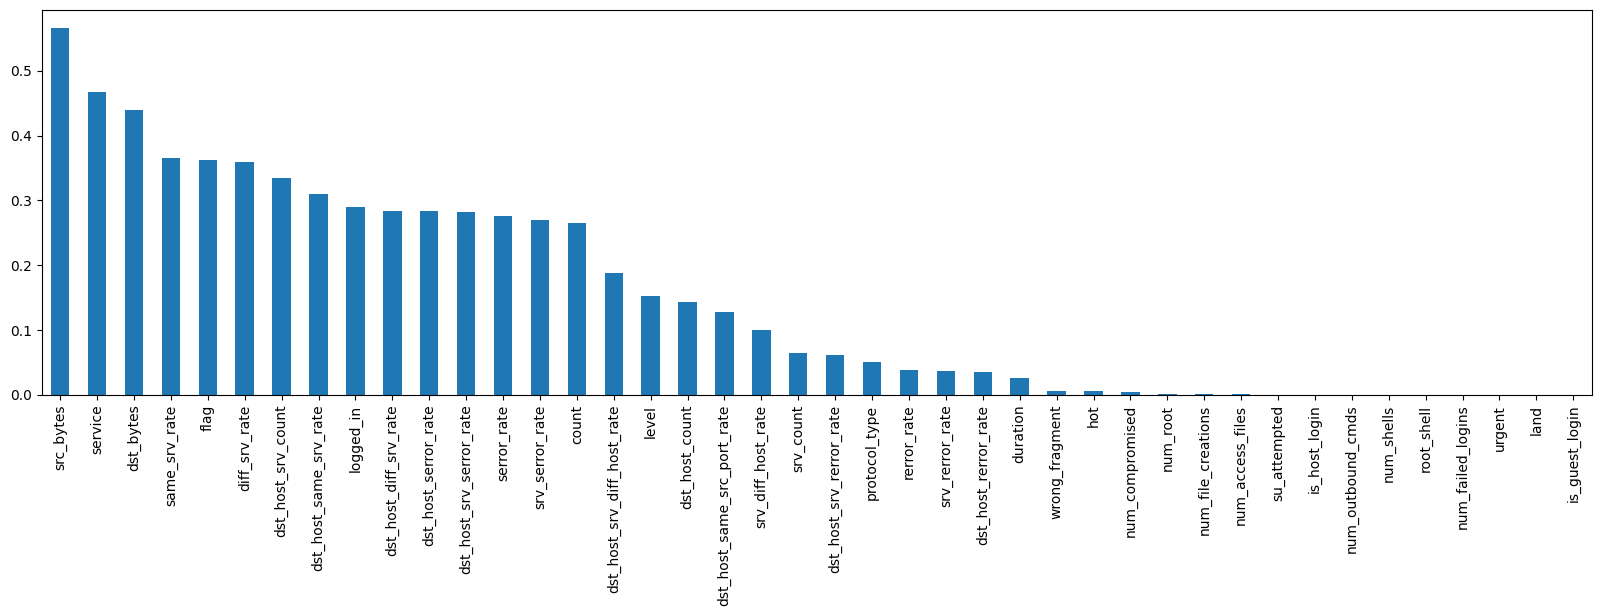

In [49]:
mutual_info.sort_values(ascending=False).plot.bar(figsize = (20,5));

## 5.4 Feature Selection

In [50]:
Select_features = SelectKBest(mutual_info_classif, k=20)
Select_features.fit(df_train, y_train)
columns = train_index[Select_features.get_support()]

In [51]:
columns.tolist()

['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'level']

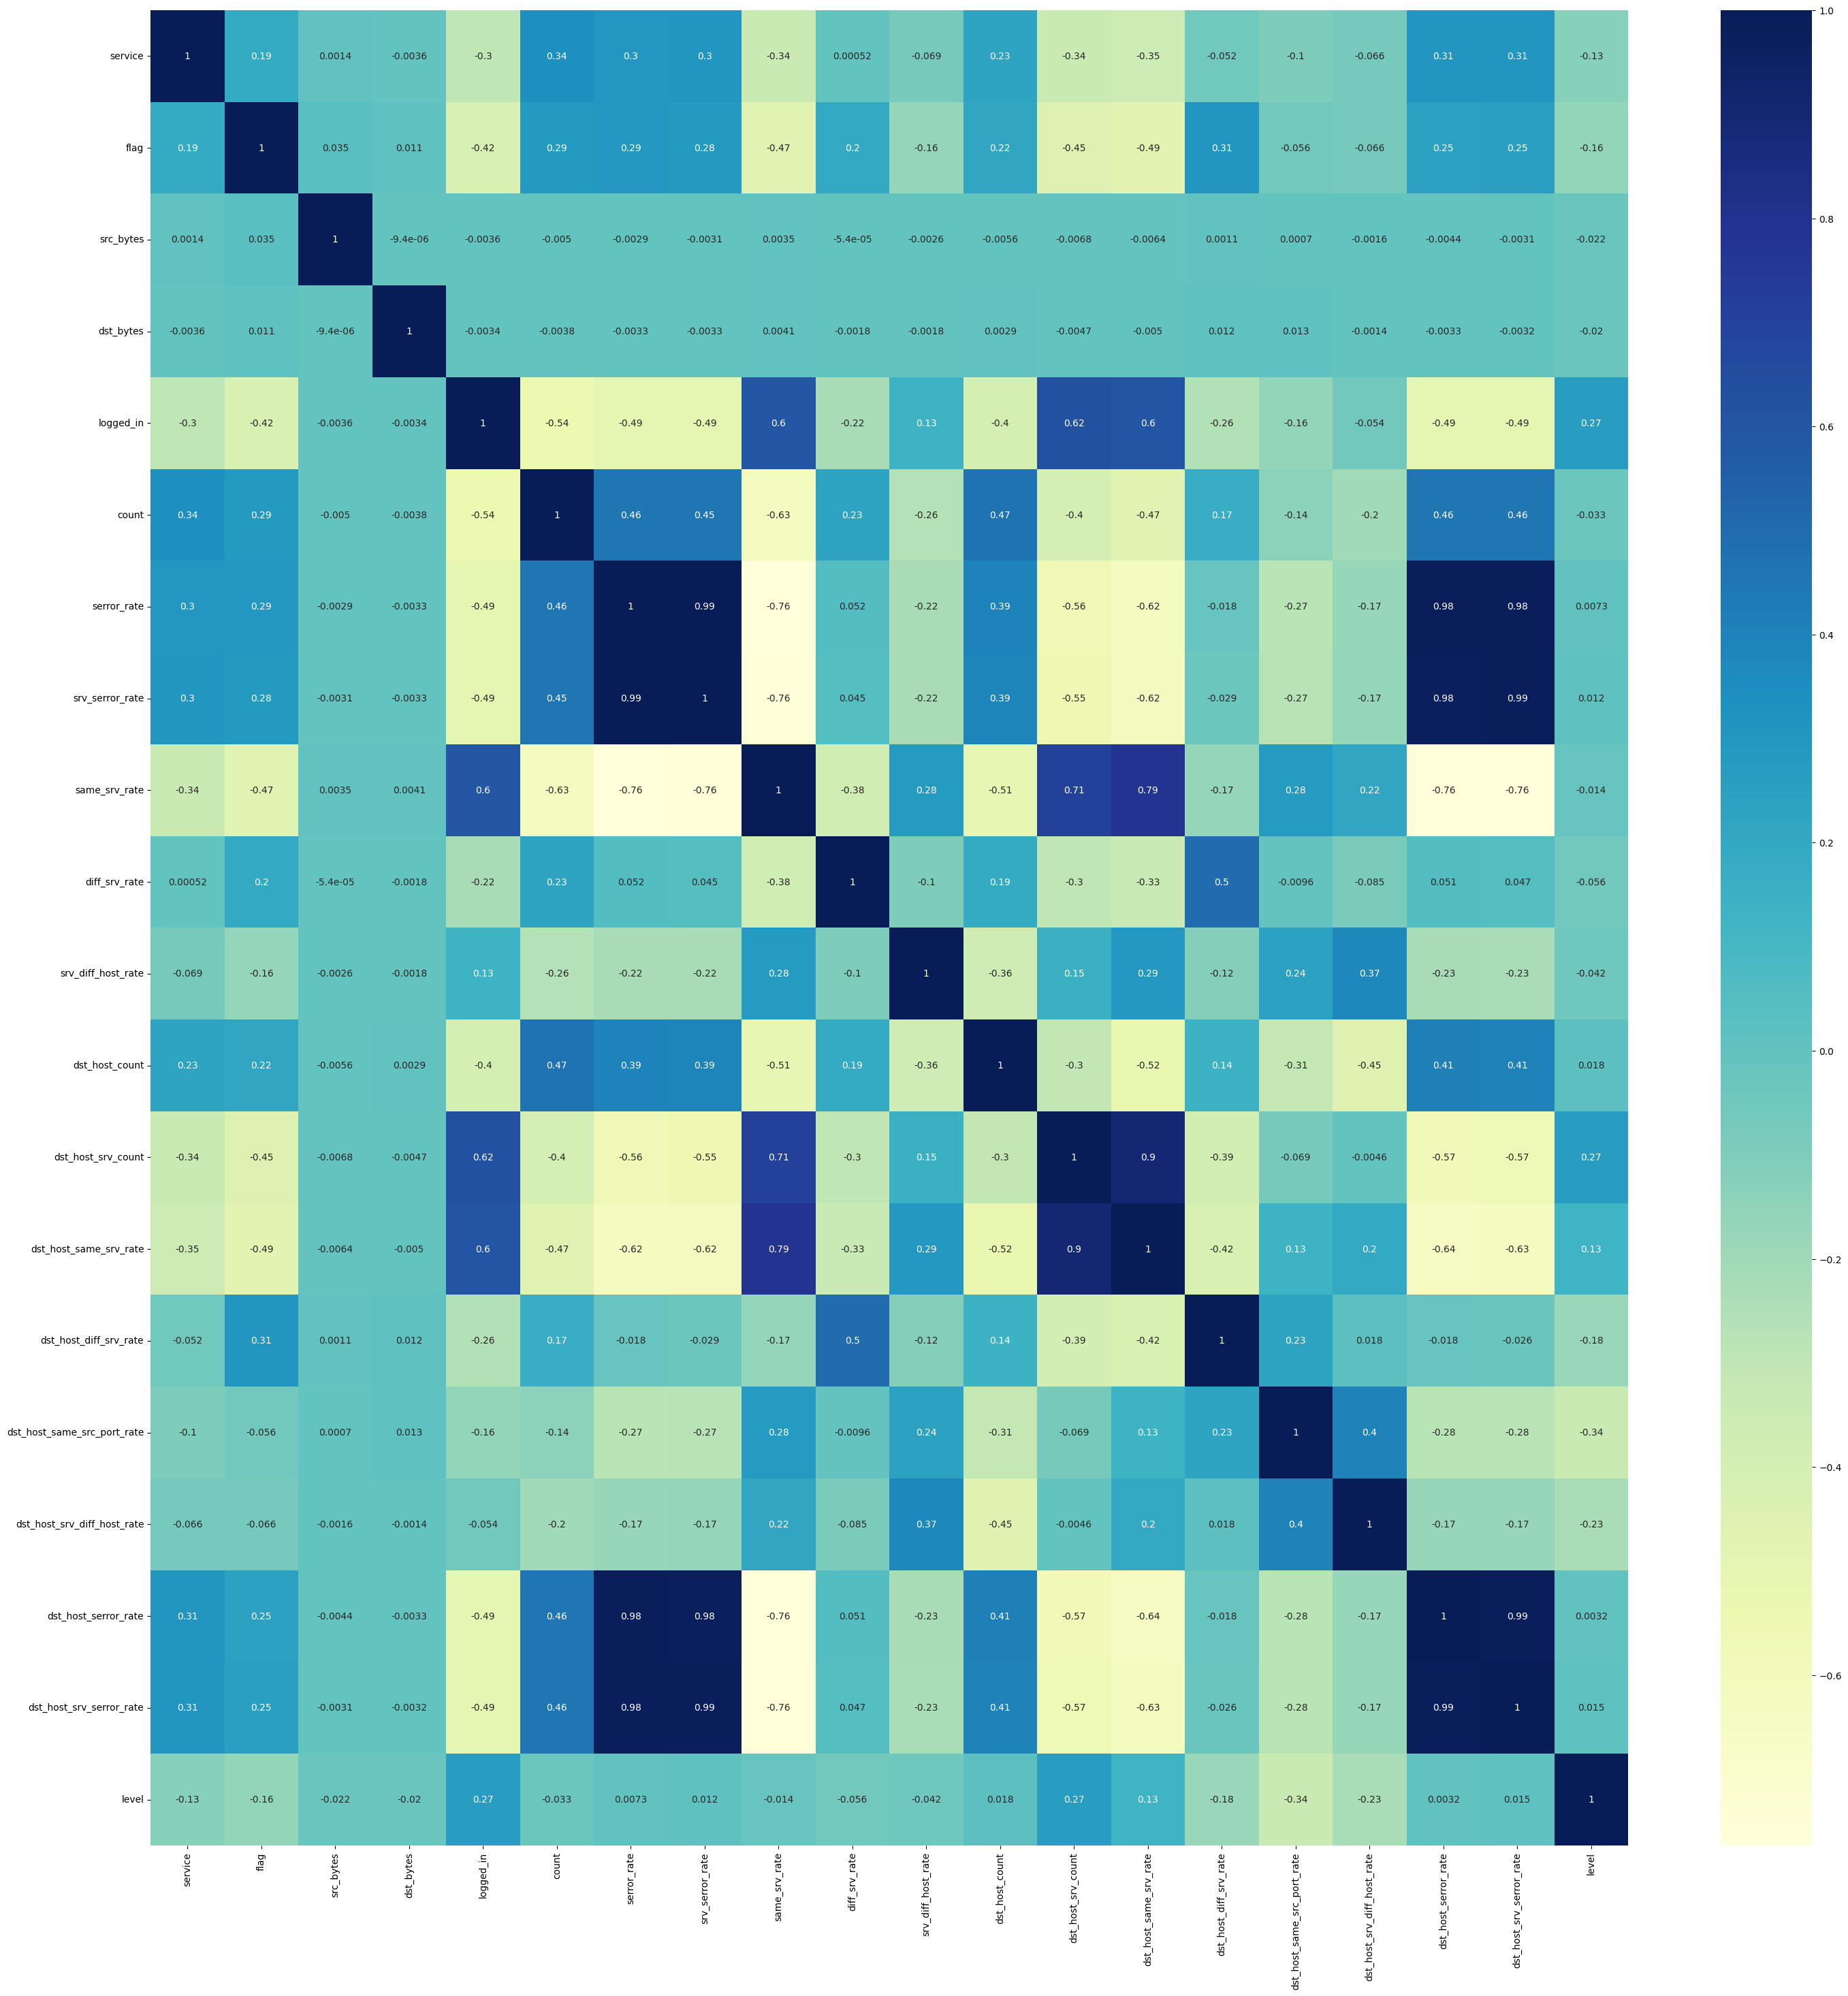

In [52]:
corr_features = df_train[columns].corr(method='pearson', numeric_only=True)

plt.figure(figsize=(35,35))
dataplot = sns.heatmap(corr_features, cmap="YlGnBu", annot=True)
plt.show()


In [53]:
corr_features

,service,flag,src_bytes,dst_bytes,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,level
service,1.00,0.19,0.00,-0.00,-0.30,0.34,0.30,0.30,-0.34,0.00,-0.07,0.23,-0.34,-0.35,-0.05,-0.10,-0.07,0.31,0.31,-0.13
flag,0.19,1.00,0.04,0.01,-0.42,0.29,0.29,0.28,-0.47,0.20,-0.16,0.22,-0.45,-0.49,0.31,-0.06,-0.07,0.25,0.25,-0.16
src_bytes,0.00,0.04,1.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.01,-0.01,0.00,0.00,-0.00,-0.00,-0.00,-0.02
dst_bytes,-0.00,0.01,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.02
logged_in,-0.30,-0.42,-0.00,-0.00,1.00,-0.54,-0.49,-0.49,0.60,-0.22,0.13,-0.40,0.62,0.60,-0.26,-0.16,-0.05,-0.49,-0.49,0.27
count,0.34,0.29,-0.01,-0.00,-0.54,1.00,0.46,0.45,-0.63,0.23,-0.26,0.47,-0.40,-0.47,0.17,-0.14,-0.20,0.46,0.46,-0.03
serror_rate,0.30,0.29,-0.00,-0.00,-0.49,0.46,1.00,0.99,-0.76,0.05,-0.22,0.39,-0.56,-0.62,-0.02,-0.27,-0.17,0.98,0.98,0.01
srv_serror_rate,0.30,0.28,-0.00,-0.00,-0.49,0.45,0.99,1.00,-0.76,0.04,-0.22,0.39,-0.55,-0.62,-0.03,-0.27,-0.17,0.98,0.99,0.01
same_srv_rate,-0.34,-0.47,0.00,0.00,0.60,-0.63,-0.76,-0.76,1.00,-0.38,0.28,-0.51,0.71,0.79,-0.17,0.28,0.22,-0.76,-0.76,-0.01
diff_srv_rate,0.00,0.20,-0.00,-0.00,-0.22,0.23,0.05,0.04,-0.38,1.00,-0.10,0.19,-0.30,-0.33,0.50,-0.01,-0.08,0.05,0.05,-0.06


In [54]:
exclude_features = set()

for i in range(len(corr_features.columns)):
    for j in range(i + 1, len(corr_features.columns)):
        feature_1 = corr_features.columns[i]
        feature_2 = corr_features.columns[j]
        correlation = corr_features.iloc[i, j]
        
        if not (-0.9 < correlation < 0.9):
            exclude_features.add(feature_2)

selected_features = [feature for feature in corr_features.columns if feature not in exclude_features]

print("Feature selezionate:", selected_features)

Feature selezionate: ['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level']


In [55]:
""" 
df_train=df_train[selected_features]
df_test=df_test[selected_features]
df_val=df_val[selected_features]
"""

' \ndf_train=df_train[selected_features]\ndf_test=df_test[selected_features]\ndf_val=df_val[selected_features]\n'

## 5.5 Scaling

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_norm = scaler.fit_transform(df)
df_test_norm = scaler.transform(df_test)
df_val_norm = scaler.transform(df_val)

# 6. MODEL

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test, xtick_labels, ytick_labels):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print('-' * 40 + "TRAIN SET" + '-' * 40)
    print("Accuracy : ", accuracy_score(y_train, y_train_pred))

    conf_mat_train = confusion_matrix(y_train, y_train_pred)
    plt.figure(figsize=(5,5))
    plt.title("TRAIN CONFUSION MATRIX")
    sns.heatmap(conf_mat_train, cmap="YlGnBu", annot=True, fmt="d", 
                xticklabels=xtick_labels, yticklabels=ytick_labels)
    plt.show()
    
    print('-' * 40 + "TEST SET" + '-' * 40)
    print("Accuracy : ", accuracy_score(y_test, y_pred))

    conf_mat_test = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    plt.title("TEST CONFUSION MATRIX")
    sns.heatmap(conf_mat_test, cmap="YlGnBu", annot=True, fmt="d", 
                xticklabels=xtick_labels, yticklabels=ytick_labels)
    plt.show()

    return y_pred

## 6.1 XGBOOST

In [58]:
from xgboost import XGBClassifier # type : ignore

XGBoost_model = XGBClassifier(eta = 0.2)

XGBoost = XGBoost_model.fit(df_train, y_train)

----------------------------------------TRAIN SET----------------------------------------
Accuracy :  0.9999900771009258


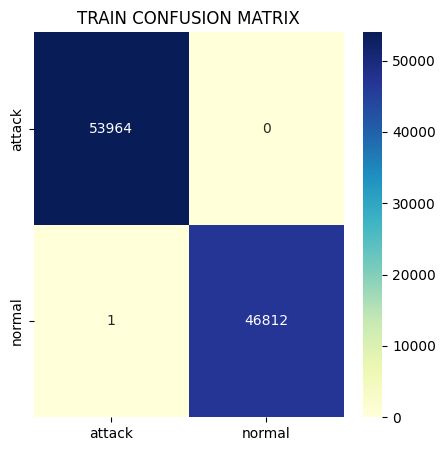

----------------------------------------TEST SET----------------------------------------
Accuracy :  0.9994443341932924


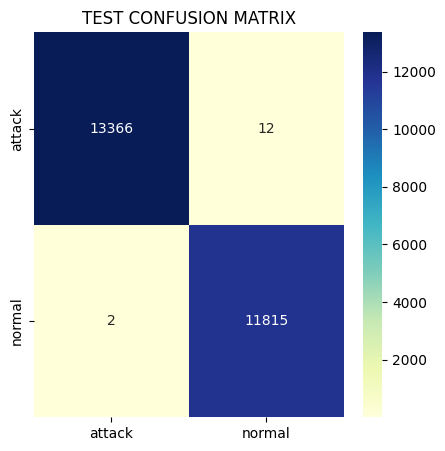

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
xtick_labels = ['attack', 'normal']
ytick_labels = xtick_labels.copy()

eval_metric(XGBoost, df_train, y_train, df_val, y_val, xtick_labels, ytick_labels)

### 6.1.1 Hyperparameters Tuning

In [60]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [61]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) 

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(df_train, y_train)

# durata exe 7minuti 35secondi

In [62]:
print("Binary Classification Best score : " + str(XGB_grid_model.best_score_))

print("Binary Classification best parameters : " + str(XGB_grid_model.best_params_))

Binary Classification Best score : 0.9995835403745496
Binary Classification best parameters : {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 128, 'subsample': 0.8}


### 6.1.2 Final model

In [63]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

XGB_model.fit(df_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 6.1.3 Validation

In [64]:
y_pred = XGB_model.predict(df_val)
y_pred_proba = XGB_model.predict_proba(df_val)

xgb_f1 = f1_score(y_val, y_pred)
xgb_recall = recall_score(y_val, y_pred)
xgb_auc = roc_auc_score(y_val, y_pred_proba[:,1])

xgb_auc

0.9999974254817066

----------------------------------------TRAIN SET----------------------------------------
Accuracy :  0.9999305397064806


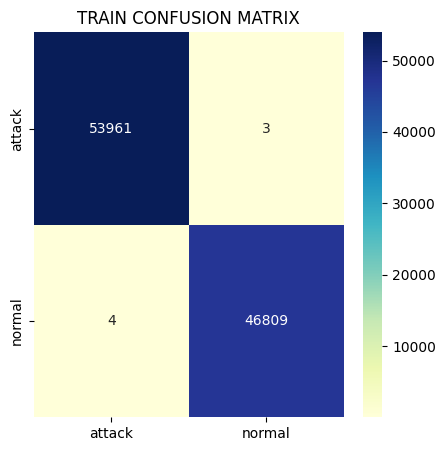

----------------------------------------TEST SET----------------------------------------
Accuracy :  0.9996427862671164


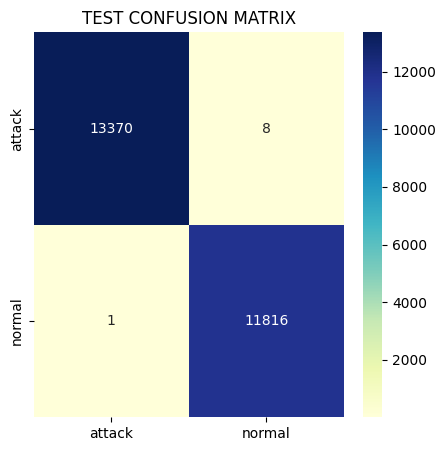

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
xtick_labels_m = ['normal', 'attack']
ytick_labels_m = xtick_labels_m.copy()

eval_metric(XGB_model, df_train, y_train, df_val, y_val, xtick_labels, ytick_labels)

### 6.1.4 Feature Importance

In [67]:
model = XGB_model
model.feature_importances_


feats = pd.DataFrame(index=df.columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
dst_bytes,0.23
same_srv_rate,0.21
src_bytes,0.09
flag,0.08
diff_srv_rate,0.05
level,0.05
count,0.04
logged_in,0.03
protocol_type,0.03
service,0.02


### 6.1.5 Test

----------------------------------------TRAIN SET----------------------------------------
Accuracy :  0.9999900771009258


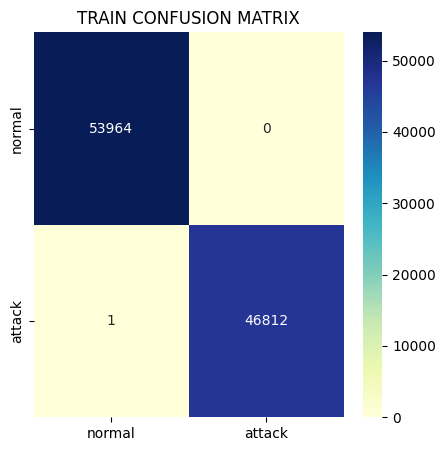

----------------------------------------TEST SET----------------------------------------
Accuracy :  0.8539236126513774


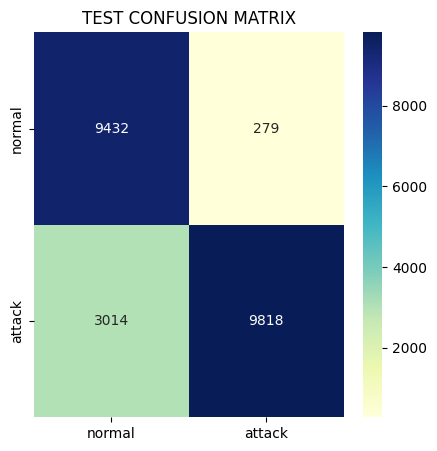

array([1, 0, 1, ..., 1, 0, 1])

In [68]:
xlabels = ['normal', 'attack']
xlabels_2 = ['attack', 'normal']
ylabels_2 = xlabels_2.copy()
ylabels = xlabels.copy()
eval_metric(XGBoost, df_train, y_train, df_test, y_test, xlabels, ylabels) 

## 6.2 MLP

In [69]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10),  # Due strati nascosti con 10 neuroni ciascuno
                    activation='relu',            
                    solver='adam',                
                    max_iter=300,                 
                    random_state=1)

mlp.fit(df_norm, y)

accuracy = mlp.score(df_test_norm, y_test)
print(f"Accuracy MLP: {accuracy:.2f}")


Accuracy MLP: 0.89


### 6.2.1 Test

----------------------------------------TRAIN SET----------------------------------------
Accuracy :  0.998856888832439


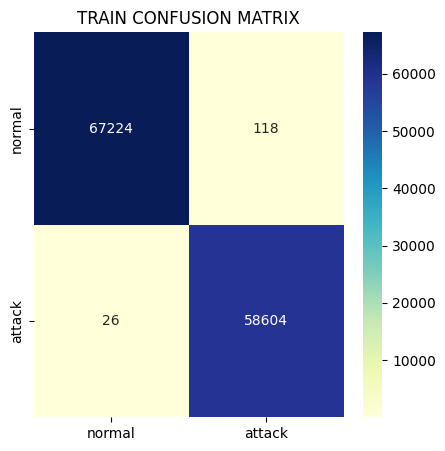

----------------------------------------TEST SET----------------------------------------
Accuracy :  0.8942909107039879


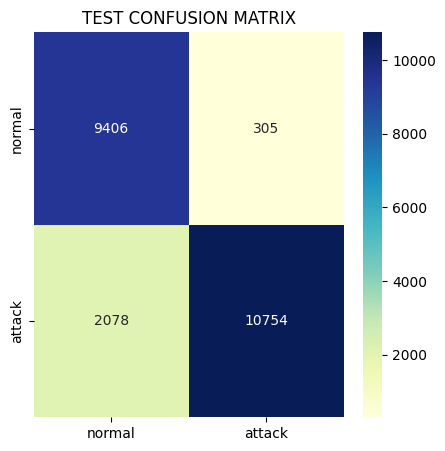

In [70]:
y_pred = eval_metric(mlp, df_norm, y, df_test_norm, y_test, xtick_labels=['normal','attack'], ytick_labels=['normal','attack'])

### 6.2.2 False Negative Analysis

#### 6.2.2.1 Attack Type Missed

In [71]:
y_pred = pd.Series(y_pred)

In [72]:
y_pred = pd.Series(y_pred, index=df_test.index)  
y_test = pd.Series(y_test, index=df_test.index)  

df_test_complete = df_test.copy()

In [73]:
df_test_complete['label'] = y_test
df_test_complete['pred'] = y_pred
df_test_complete['attack_type'] = attack_type_test


In [74]:
f_n = df_test_complete[(df_test_complete['pred'] == 0) & (df_test_complete['label'] == 1)]

f_n.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,label,pred,attack_type
3,1,1,9,5,0,15,0,0,0,0,...,0.03,0.02,0.00,0.00,0.83,0.71,11,1,0,mscan
57,7428,1,9,0,0,44,0,0,0,0,...,0.00,0.00,0.33,0.39,0.12,0.06,18,1,0,processtable
59,4,1,53,0,28,93,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,18,1,0,guess_passwd
93,3,1,53,0,28,93,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,17,1,0,guess_passwd
118,0,0,1,0,48,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,15,1,0,snmpguess


In [75]:
f_n['attack_type'].unique()

array(['mscan', 'processtable', 'guess_passwd', 'snmpguess',
       'warezmaster', 'apache2', 'mailbomb', 'sendmail', 'satan', 'saint',
       'smurf', 'httptunnel', 'neptune', 'ps', 'xterm', 'buffer_overflow',
       'named', 'imap', 'multihop', 'rootkit', 'land', 'xsnoop'],
      dtype=object)

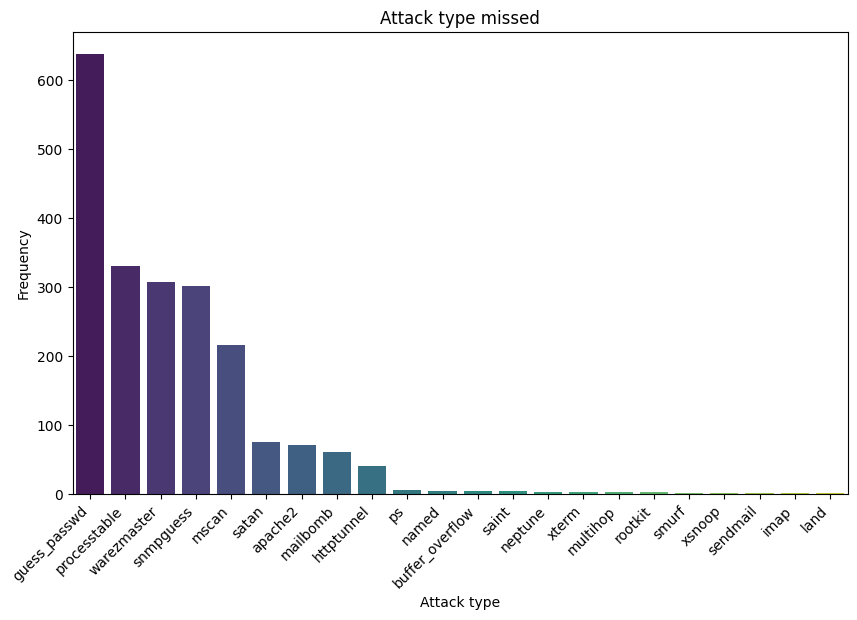

In [76]:
attack_counts = f_n['attack_type'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='viridis')

plt.xticks(rotation=45, ha='right')  
plt.xlabel('Attack type')
plt.ylabel('Frequency')
plt.title('Attack type missed')

plt.show()

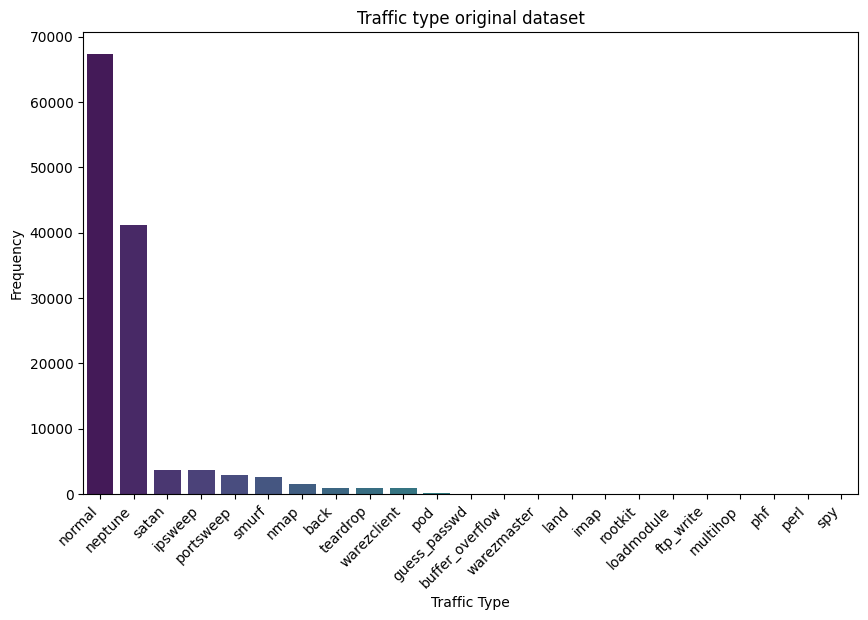

In [77]:
attack_counts = df_0['attack'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='viridis')

plt.xticks(rotation=45, ha='right') 
plt.xlabel('Traffic Type')
plt.ylabel('Frequency')
plt.title('Traffic type original dataset')

plt.show()

quindi ci sono molti falsi positivi poiché nel train set ci sono troppi pochi attacchi di questa tipologia.

vediamo nel dataset di train quante istanze ci sono per categoria di attacco (Dos, Probe, U2R, R2L)

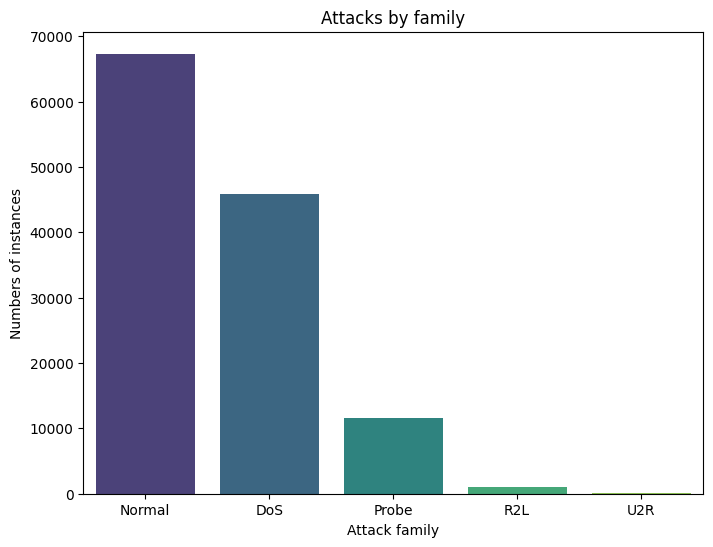

In [78]:
dos_attacks = [
    'apache2', 'back', 'land', 'neptune', 'mailbomb',
    'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'
]

probe_attacks = [
    'ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'
]

privilege_U2R_attacks = [
    'buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit',
    'sqlattack', 'xterm'
]

access_R2L_attacks = [
    'ftp_write', 'guess_passwd', 'http_tunnel', 'imap', 'multihop',
    'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'spy',
    'warezclient', 'warezmaster', 'xclock', 'xsnoop'
]


def map_attack_family(attack):
    if attack in dos_attacks:
        return 'DoS'
    elif attack in probe_attacks:
        return 'Probe'
    elif attack in privilege_U2R_attacks:
        return 'U2R'
    elif attack in access_R2L_attacks:
        return 'R2L'
    else:
        return 'Normal'  

df['attack_family'] = df_0['attack'].map(map_attack_family)

attack_family_counts = df['attack_family'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=attack_family_counts.index, y=attack_family_counts.values, palette='viridis')

plt.xlabel('Attack family')
plt.ylabel('Numbers of instances')
plt.title('Attacks by family')

plt.show()


il problema del classificatore è dunque che sono presenti poche tipologie di attacchi r2l e u2r e in fase di test sono principalmente queste le categorie associati a falsi negativi. Dunque il problema, più che il classificatore, potrebbe essere un limite del dataset

### 6.2.2.2 Zero-Day Attacks Analysis

In [79]:
df_0['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [80]:
df_test_0['attack'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [81]:
set_df = set(df_0['attack'].unique())
set_df_test = set(df_test_0['attack'].unique())

valori_solo_in_df = set_df - set_df_test

valori_solo_in_df_test = set_df_test - set_df

print("Valori presenti solo nel TRAIN e non nel TEST:")
valori_solo_in_df


Valori presenti solo nel TRAIN e non nel TEST:


{'spy', 'warezclient'}

In [82]:

print("\nValori presenti solo nel TEST e non nel TRAIN:")
valori_solo_in_df_test


Valori presenti solo nel TEST e non nel TRAIN:


{'apache2',
 'httptunnel',
 'mailbomb',
 'mscan',
 'named',
 'processtable',
 'ps',
 'saint',
 'sendmail',
 'snmpgetattack',
 'snmpguess',
 'sqlattack',
 'udpstorm',
 'worm',
 'xlock',
 'xsnoop',
 'xterm'}

### 6.2.2.3 Family of Attacks Missed

In [83]:
dos_attacks_final = [
    'worm',
    'apache2',
    'processtable',
    'mailbomb',
    'udpstorm'
]

probe_attacks_final = [
    'mscan',
    'saint'
]

u2r_attacks_final = [
    'sqlattack',
    'xterm',
    'ps'
]

r2l_attacks_final = [
    'sendmail',
    'xsnoop',
    'xlock',
    'snmpgetattack',
    'snmpguess',
    'httptunnel',
    'named'
]


print("DoS Attacks Final:", dos_attacks_final)
print("Probe Attacks Final:", probe_attacks_final)
print("U2R Attacks Final:", u2r_attacks_final)
print("R2L Attacks Final:", r2l_attacks_final)


DoS Attacks Final: ['worm', 'apache2', 'processtable', 'mailbomb', 'udpstorm']
Probe Attacks Final: ['mscan', 'saint']
U2R Attacks Final: ['sqlattack', 'xterm', 'ps']
R2L Attacks Final: ['sendmail', 'xsnoop', 'xlock', 'snmpgetattack', 'snmpguess', 'httptunnel', 'named']
